# Sklearn Decimal NoNorm

In [30]:
import pandas as pd
decimalDf = pd.read_csv('../decimal_nonorm_dataset.csv')

In [31]:
X = decimalDf[['WHITE',
            'BLACK_OR_AFRICAN_AMERICAN',
            'AMERICAN_INDIAN_AND_ALASKA_NATIVE',
            'ASIAN',
            'NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER',
            'HISPANIC_OR_LATINO'
            ]]
y = decimalDf['GrowthRate']

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import time

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)
models = {}
rmseValues = {}
trainingTimes = {}
predictionTimes = {}
maeValues = {}
y_pred = {}

In [33]:
def processModel(model, modelKey):
    # Train Model
    print('----- ----- -----')
    print('Training model', modelKey)
    trainingStartTime = time.time()
    trainedModel = model.fit(X_train, y_train)
    trainingTime = time.time() - trainingStartTime
    print('Finished training in ' + str(trainingTime) + 's')

    # Predict
    print('Predicting on model', modelKey)
    predictionStartTime = time.time()
    modelPredictions = trainedModel.predict(X_test)
    predictionTime = time.time() - predictionStartTime
    print('Finished predictions in ' + str(predictionTime) + 's')

    # Get Accuracy
    print('Getting RMSE on model', modelKey)
    rmse = root_mean_squared_error(y_test, modelPredictions)

    # Get Error
    print('Getting MAE on model', modelKey)
    mae = mean_absolute_error(y_test, modelPredictions)

    # Finished
    print()
    print('Finished processing model', modelKey)
    print('RMSE: ' + str(rmse))
    print('MAE: ' + str(mae))
    print('Training time: ' + str(trainingTime) + 's')
    print('Prediction time: ' + str(predictionTime) + 's')
    print('----- ----- -----')

    return (rmse, trainingTime, predictionTime, mae, modelPredictions)

In [34]:
# Set Model Properties
model = 'Linear Regression'
from sklearn.linear_model import LinearRegression
models[model] = LinearRegression()
rmseValues[model], trainingTimes[model], predictionTimes[model], maeValues[model], y_pred[model] = processModel(models[model], model)

----- ----- -----
Training model Linear Regression
Finished training in 0.029662132263183594s
Predicting on model Linear Regression
Finished predictions in 0.0015289783477783203s
Getting RMSE on model Linear Regression
Getting MAE on model Linear Regression

Finished processing model Linear Regression
RMSE: 30.047413614808296
MAE: 6.273043246472885
Training time: 0.029662132263183594s
Prediction time: 0.0015289783477783203s
----- ----- -----


In [35]:
# Set Model Properties
model = 'Ridge Regression'
from sklearn.linear_model import Ridge
models[model] = Ridge()
rmseValues[model], trainingTimes[model], predictionTimes[model], maeValues[model], y_pred[model] = processModel(models[model], model)

----- ----- -----
Training model Ridge Regression
Finished training in 0.011816978454589844s
Predicting on model Ridge Regression
Finished predictions in 0.0019037723541259766s
Getting RMSE on model Ridge Regression
Getting MAE on model Ridge Regression

Finished processing model Ridge Regression
RMSE: 30.047413614806636
MAE: 6.273043246471906
Training time: 0.011816978454589844s
Prediction time: 0.0019037723541259766s
----- ----- -----


In [36]:
# Set Model Properties
model = 'Ridge Cross Validation Regression'
from sklearn.linear_model import RidgeCV
models[model] = RidgeCV()
rmseValues[model], trainingTimes[model], predictionTimes[model], maeValues[model], y_pred[model] = processModel(models[model], model)

----- ----- -----
Training model Ridge Cross Validation Regression
Finished training in 0.08282017707824707s
Predicting on model Ridge Cross Validation Regression
Finished predictions in 0.0014483928680419922s
Getting RMSE on model Ridge Cross Validation Regression
Getting MAE on model Ridge Cross Validation Regression

Finished processing model Ridge Cross Validation Regression
RMSE: 30.047413610206068
MAE: 6.273043241141436
Training time: 0.08282017707824707s
Prediction time: 0.0014483928680419922s
----- ----- -----


In [37]:
# Set Model Properties
model = 'Huber Regression (Outlier Robust)'
from sklearn.linear_model import HuberRegressor
models[model] = HuberRegressor()
rmseValues[model], trainingTimes[model], predictionTimes[model], maeValues[model], y_pred[model] = processModel(models[model], model)

----- ----- -----
Training model Huber Regression (Outlier Robust)
Finished training in 1.818721055984497s
Predicting on model Huber Regression (Outlier Robust)
Finished predictions in 0.0012211799621582031s
Getting RMSE on model Huber Regression (Outlier Robust)
Getting MAE on model Huber Regression (Outlier Robust)

Finished processing model Huber Regression (Outlier Robust)
RMSE: 40.935314620920714
MAE: 6.05790716341033
Training time: 1.818721055984497s
Prediction time: 0.0012211799621582031s
----- ----- -----


In [38]:
# Set Model Properties
model = 'Decision Tree Regression'
from sklearn.tree import DecisionTreeRegressor
models[model] = DecisionTreeRegressor()
rmseValues[model], trainingTimes[model], predictionTimes[model], maeValues[model], y_pred[model] = processModel(models[model], model)

----- ----- -----
Training model Decision Tree Regression
Finished training in 2.012734889984131s
Predicting on model Decision Tree Regression
Finished predictions in 0.04442596435546875s
Getting RMSE on model Decision Tree Regression
Getting MAE on model Decision Tree Regression

Finished processing model Decision Tree Regression
RMSE: 43.623200783015584
MAE: 9.304256814423653
Training time: 2.012734889984131s
Prediction time: 0.04442596435546875s
----- ----- -----


In [39]:
resultsDf = pd.DataFrame(index=models.keys(), columns=['RMSE', 'MAE', 'TrainingTime', 'PredictionTime'])
resultsDf['RMSE'] = rmseValues.values()
resultsDf['MAE'] = maeValues.values()
resultsDf['TrainingTime'] = trainingTimes.values()
resultsDf['PredictionTime'] = predictionTimes.values()
resultsDf = resultsDf.sort_values(by='RMSE', ascending=True)

resultsDf

,RMSE,MAE,TrainingTime,PredictionTime
Ridge Cross Validation Regression,30.047414,6.273043,0.082820,0.001448
Ridge Regression,30.047414,6.273043,0.011817,0.001904
Linear Regression,30.047414,6.273043,0.029662,0.001529
Huber Regression (Outlier Robust),40.935315,6.057907,1.818721,0.001221
Decision Tree Regression,43.623201,9.304257,2.012735,0.044426


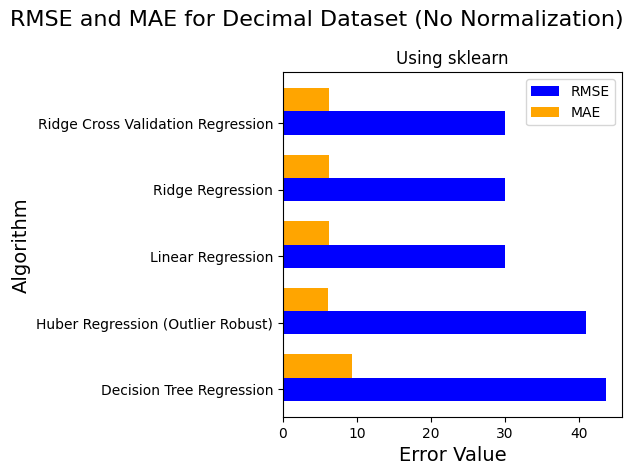

In [40]:
import matplotlib.pyplot as plt
toPlot = resultsDf.drop(['TrainingTime', 'PredictionTime'], axis=1)
toPlot = toPlot.sort_values('RMSE', ascending=False)


fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(toPlot))

# Plot RMSE
bars1 = ax.barh(index, toPlot['RMSE'], bar_width, label='RMSE', color='blue')

# Plot MAE
bars2 = ax.barh([i + bar_width for i in index], toPlot['MAE'], bar_width, label='MAE', color='orange')

# Add labels, titles, and legend
plt.title('Using sklearn', fontsize=12)
plt.suptitle('RMSE and MAE for Decimal Dataset (No Normalization)', fontsize=16)
plt.xlabel('Error Value', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)
plt.yticks(index, toPlot.index)
plt.legend()

plt.tight_layout()
plt.savefig('../plots/decimal_rms_mae_nonorm_sklearn.png', bbox_inches='tight')
plt.show()

In [42]:
predsDf = pd.DataFrame({'predictions': y_pred['Ridge Cross Validation Regression'], 'actual': y_test})
predsDf.head()

,predictions,actual
11553,7.979149,7.053537
1177,7.976989,2.573754
3111,7.976445,1.904283
111294,7.964063,24.544223
173138,7.970045,13.072672


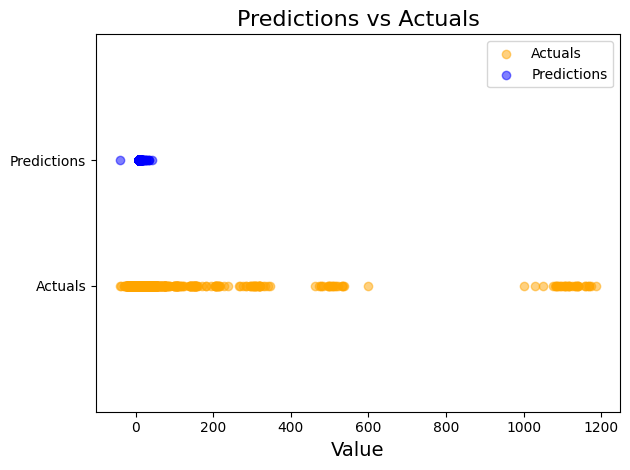

In [67]:
fig, ax = plt.subplots()

# Plot actuals as points
ax.scatter(predsDf['actual'], [0]*len(predsDf), color='orange', label='Actuals', alpha=0.5)
# Plot predictions as points
ax.scatter(predsDf['predictions'], [1]*len(predsDf), color='blue', label='Predictions', alpha=0.5)

# Add labels, titles, and legend
plt.xlabel('Value', fontsize=14)
plt.title('Predictions vs Actuals', fontsize=16)
plt.yticks([0, 1], ['Actuals', 'Predictions'])
plt.ylim(-1, 2)
plt.legend()

plt.tight_layout()
plt.savefig('../plots/decimal_preds_vs_actuals_sklearn.png', bbox_inches='tight')
plt.show()

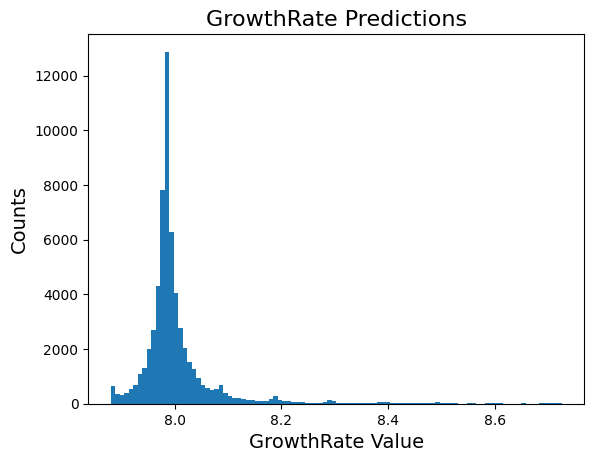

In [68]:
minVal = predsDf['predictions'].quantile(0.01)
maxVal = predsDf['predictions'].quantile(0.99)
filteredDf = predsDf[predsDf['predictions'].between(minVal, maxVal)]

filteredDf['predictions'].hist(bins=100, alpha=1, label='Predictions')

# minVal = predsDf['actual'].quantile(0.01)
# maxVal = predsDf['actual'].quantile(0.99)
# filteredDf = predsDf[predsDf['actual'].between(minVal, maxVal)]

# filteredDf['actual'].hist(bins=100, alpha=1, label='Actual')

# Customizing plot
plt.xlabel('GrowthRate Value', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('GrowthRate Predictions', fontsize=16)
plt.grid(False)

plt.savefig('../plots/decimal_preds_sklearn.png', bbox_inches='tight')
plt.show()

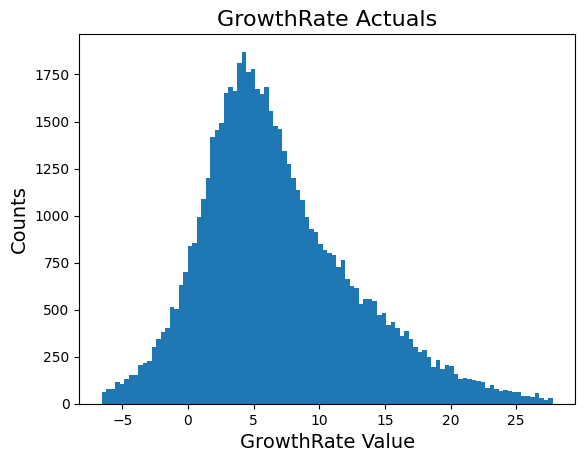

In [69]:
minVal = predsDf['actual'].quantile(0.01)
maxVal = predsDf['actual'].quantile(0.99)
filteredDf = predsDf[predsDf['actual'].between(minVal, maxVal)]

filteredDf['actual'].hist(bins=100, alpha=1, label='Actual')

# Customizing plot
plt.xlabel('GrowthRate Value', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('GrowthRate Actuals', fontsize=16)
plt.grid(False)

plt.savefig('../plots/decimal_actuals_sklearn.png', bbox_inches='tight')
plt.show()